# Упражнения по методу KNN

Метод KNN для классификации достаточно простой, поэтому давайте применим наши знания для создания пайплайна и применения GridSearchCV - их можно будет использовать и для других моделей.


## Сонарные данные

### Определение камня или мины

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Наша цель - создать модель машинного обучения, которая может определить тип объекта - мина или камень - на основе ответа от сонаров на 60 различных частотах.


Источник данных: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Выполните задания, написанные жирным шрифтом

**ЗАДАНИЕ: Выполните ячейки ниже, чтобы загрузить данные.**

In [1116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1117]:
df = pd.read_csv('sonar.all-data.csv')

In [1118]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [1120]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [1121]:
df['Label']

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Label, Length: 208, dtype: object

In [1122]:
df['Label'].replace({'M':0,'R':1}, inplace = True)

In [1123]:
df["Label"]

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Label, Length: 208, dtype: int64

## Исследование данных

**ЗАДАНИЕ: Нарисуйте тепловую карту heatmap, показывающую корреляцию между откликами на различных частотах.**

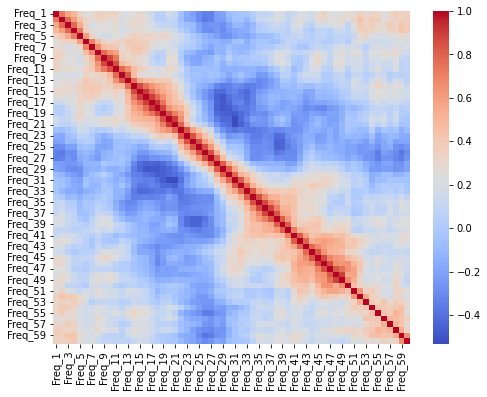

In [1124]:
# Напишите Ваш код здесь
plt.figure(figsize=(8, 6), dpi=72)
sns.heatmap(df1.corr(), cmap='coolwarm');

<AxesSubplot:>

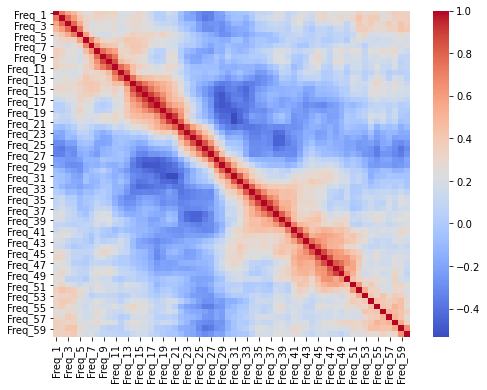

**ЗАДАНИЕ: Какие 5 частот лучше всего коррелируют с целевой переменной?**

*Замечание: Вы можете пометить целевую переменную с помощью значений 0 и 1.*

*Замечание 2: мы ищем **абсолютные** значения корреляции.*

In [986]:
# Напишите Ваш код здесь


In [1125]:
df["Target"] = df["Label"]

In [1126]:
df = df.drop(columns=['Label'])

In [1127]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Разбиение на обучающий и тестовый наборы данных

Здесь мы будем использовать кросс-валидацию на 90% данных, и затем оценим результаты работы нашей модели на тестовом наборе данных в 10%.

**ЗАДАНИЕ: Разделите данные на признаки и целевую переменную, а затем разбейте все данные на обучающий и тестовый наборы данных, в отношении 90% и 10%.**

In [1128]:
# Напишите Ваш код здесь
X = df.drop('Target', axis=1)
y = df['Target']

In [1129]:
from sklearn.model_selection import train_test_split

In [1130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**ЗАДАНИЕ: Создайте объект PipeLine, в котором будет StandardScaler и модель KNN**

In [1131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [1132]:
# model = KNeighborsClassifier()
scaler = StandardScaler()

In [1133]:
model = KNeighborsClassifier()

In [1134]:
pipe = Pipeline([('scaler', scaler), ('knn', model)])

In [1135]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

**ЗАДАНИЕ: С помощью пайплайна выполните поиск по сетке для различных значений k, и выведите наилучшие параметры.**

In [1136]:
from sklearn.model_selection import GridSearchCV

In [1137]:
k_values = list(range(1,30))

In [1138]:
param_grid = {'knn__n_neighbors': k_values}

In [1139]:
full_model = GridSearchCV(pipe,param_grid,cv=5, scoring='accuracy')

In [1140]:
full_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [1142]:
full_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(СЛОЖНОЕ) ЗАДАНИЕ: Используя словарь .cv_results_, попробуйте нарисовать график средних тестовых оценок (mean_test_score) для каждого значения K.**

In [1143]:
# Напишите Ваш код здесь
full_model.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

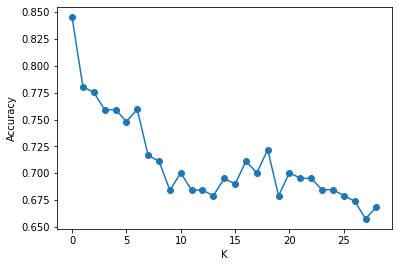

In [1148]:
plt.figure(figsize=(6, 4), dpi=72)
plt.plot(full_model.cv_results_['mean_test_score'], marker='o');
plt.xlabel("K")
plt.ylabel("Accuracy")

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

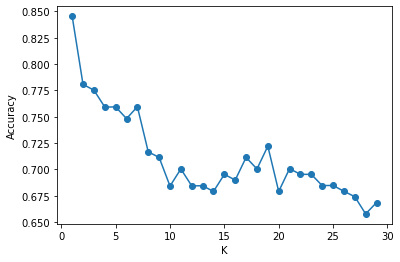

### Финальная оценка модели

**ЗАДАНИЕ: используя объект grid classifier с предыдущего шага, создайте финальный отчёт "classification report" и матрицу "confusion matrix".**

In [1149]:
# Напишите Ваш код здесь
y_pred = full_model.predict(X_test)

In [1150]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

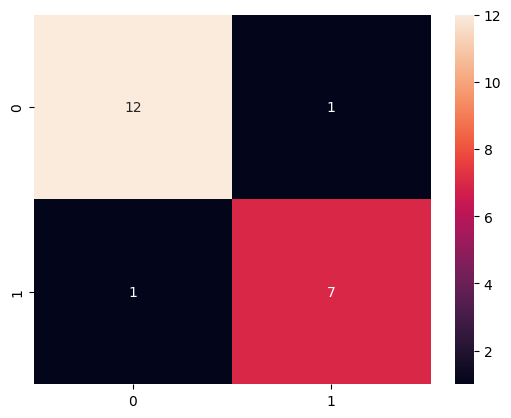

In [1151]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [1152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Отличная работа!

In [1155]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score * 100:.2f}')

Accuracy: 90.48


In [1154]:
full_model.predict(x.reshape(1, -1))

array([1], dtype=int64)